# import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# data uploading

In [2]:
df=pd.read_csv('Crimes.csv')

In [80]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,month,day,year,block
0,11798117,JC397040,2019-08-17 23:59:00,058XX W EDDY ST,820,THEFT,$500 AND UNDER,STREET,True,False,1633,16,36.0,15,8,17,2019,058XX
1,11798223,JC397365,2019-08-17 23:59:00,007XX E 87TH ST,1310,CRIMINAL DAMAGE,TO PROPERTY,TAVERN/LIQUOR STORE,False,False,632,6,6.0,44,8,17,2019,007XX
2,11797883,JC396936,2019-08-17 23:57:00,022XX W 50TH PL,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,SIDEWALK,False,False,931,9,15.0,63,8,17,2019,022XX
3,11797909,JC397003,2019-08-17 23:55:00,086XX S PHILLIPS AVE,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,ALLEY,False,False,423,4,7.0,46,8,17,2019,086XX
4,11797926,JC396947,2019-08-17 23:45:00,079XX S SOUTH CHICAGO AVE,460,BATTERY,SIMPLE,SIDEWALK,True,False,411,4,8.0,46,8,17,2019,079XX


# data cleaning and data analysing

In [4]:
df.describe()

,ID,Beat,District,Ward,Community Area
count,1.619420e+05,161942.000000,161942.000000,161935.000000,161942.000000
mean,1.165604e+07,1133.964555,11.111311,23.355000,36.554995
std,5.126516e+05,695.570169,6.946305,13.934785,21.365744
min,2.436800e+04,111.000000,1.000000,1.000000,0.000000
25%,1.161715e+07,611.000000,6.000000,10.000000,23.000000
50%,1.167888e+07,1024.000000,10.000000,24.000000,32.000000
75%,1.173948e+07,1713.000000,17.000000,34.000000,53.000000
max,1.180480e+07,2535.000000,25.000000,50.000000,77.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161942 entries, 0 to 161941
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    161942 non-null  int64  
 1   Case Number           161942 non-null  object 
 2   Date                  161942 non-null  object 
 3   Block                 161942 non-null  object 
 4   IUCR                  161942 non-null  object 
 5   Primary Type          161942 non-null  object 
 6   Description           161942 non-null  object 
 7   Location Description  161373 non-null  object 
 8   Arrest                161942 non-null  bool   
 9   Domestic              161942 non-null  bool   
 10  Beat                  161942 non-null  int64  
 11  District              161942 non-null  int64  
 12  Ward                  161935 non-null  float64
 13  Community Area        161942 non-null  int64  
dtypes: bool(2), float64(1), int64(4), object(7)
memory u

In [6]:
df['Date']=pd.to_datetime(df['Date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161942 entries, 0 to 161941
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   ID                    161942 non-null  int64         
 1   Case Number           161942 non-null  object        
 2   Date                  161942 non-null  datetime64[ns]
 3   Block                 161942 non-null  object        
 4   IUCR                  161942 non-null  object        
 5   Primary Type          161942 non-null  object        
 6   Description           161942 non-null  object        
 7   Location Description  161373 non-null  object        
 8   Arrest                161942 non-null  bool          
 9   Domestic              161942 non-null  bool          
 10  Beat                  161942 non-null  int64         
 11  District              161942 non-null  int64         
 12  Ward                  161935 non-null  float64       
 13 

In [8]:
df['month']=df['Date'].dt.month
df['day']=df['Date'].dt.day
df['year']=df['Date'].dt.year

In [9]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,month,day,year
0,11798117,JC397040,2019-08-17 23:59:00,058XX W EDDY ST,820,THEFT,$500 AND UNDER,STREET,True,False,1633,16,36.0,15,8,17,2019
1,11798223,JC397365,2019-08-17 23:59:00,007XX E 87TH ST,1310,CRIMINAL DAMAGE,TO PROPERTY,TAVERN/LIQUOR STORE,False,False,632,6,6.0,44,8,17,2019
2,11797883,JC396936,2019-08-17 23:57:00,022XX W 50TH PL,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,SIDEWALK,False,False,931,9,15.0,63,8,17,2019
3,11797909,JC397003,2019-08-17 23:55:00,086XX S PHILLIPS AVE,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,ALLEY,False,False,423,4,7.0,46,8,17,2019
4,11797926,JC396947,2019-08-17 23:45:00,079XX S SOUTH CHICAGO AVE,460,BATTERY,SIMPLE,SIDEWALK,True,False,411,4,8.0,46,8,17,2019


In [10]:
df.isnull().sum()

ID                        0
Case Number               0
Date                      0
Block                     0
IUCR                      0
Primary Type              0
Description               0
Location Description    569
Arrest                    0
Domestic                  0
Beat                      0
District                  0
Ward                      7
Community Area            0
month                     0
day                       0
year                      0
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
month                   0
day                     0
year                    0
dtype: int64

In [13]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'month', 'day', 'year'],
      dtype='object')

In [14]:
df['block']=df['Block'].str.split().str[0]

In [15]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,month,day,year,block
0,11798117,JC397040,2019-08-17 23:59:00,058XX W EDDY ST,820,THEFT,$500 AND UNDER,STREET,True,False,1633,16,36.0,15,8,17,2019,058XX
1,11798223,JC397365,2019-08-17 23:59:00,007XX E 87TH ST,1310,CRIMINAL DAMAGE,TO PROPERTY,TAVERN/LIQUOR STORE,False,False,632,6,6.0,44,8,17,2019,007XX
2,11797883,JC396936,2019-08-17 23:57:00,022XX W 50TH PL,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,SIDEWALK,False,False,931,9,15.0,63,8,17,2019,022XX
3,11797909,JC397003,2019-08-17 23:55:00,086XX S PHILLIPS AVE,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,ALLEY,False,False,423,4,7.0,46,8,17,2019,086XX
4,11797926,JC396947,2019-08-17 23:45:00,079XX S SOUTH CHICAGO AVE,460,BATTERY,SIMPLE,SIDEWALK,True,False,411,4,8.0,46,8,17,2019,079XX


In [68]:
#which crime type is most arrested
df1=df.groupby(['Primary Type','Arrest']).size().rename('arrest_counts').reset_index()
df1.head()

,Primary Type,Arrest,arrest_counts
0,ARSON,False,204
1,ARSON,True,17
2,ASSAULT,False,10797
3,ASSAULT,True,2421
4,BATTERY,False,25270


In [17]:
#in which location and which crime type has the highest number of crime
df2=df.groupby(['Location Description','Primary Type']).size().rename('total_crime').reset_index()
df2.sort_values(by='total_crime',ascending=False,inplace=True)

In [18]:
df2

,Location Description,Primary Type,total_crime
1239,STREET,THEFT,8132
150,APARTMENT,BATTERY,7734
969,RESIDENCE,BATTERY,6562
1219,STREET,CRIMINAL DAMAGE,5458
1215,STREET,BATTERY,4226
...,...,...,...
1143,"SCHOOL, PUBLIC, GROUNDS",INTIMIDATION,1
1142,"SCHOOL, PUBLIC, GROUNDS",INTERFERENCE WITH PUBLIC OFFICER,1
1141,"SCHOOL, PUBLIC, GROUNDS",GAMBLING,1
313,CHA GROUNDS,HOMICIDE,1


In [67]:
#
df3=df.groupby('Primary Type')['Arrest'].value_counts().unstack()
df3.sort_values(by=True,ascending=False).head(10)

Arrest,False,True
Primary Type,,
NARCOTICS,4.0,8763.0
BATTERY,25270.0,6457.0
THEFT,34480.0,3719.0
WEAPONS VIOLATION,1349.0,2713.0
CRIMINAL TRESPASS,1847.0,2451.0
ASSAULT,10797.0,2421.0
OTHER OFFENSE,8414.0,2347.0
CRIMINAL DAMAGE,15793.0,1013.0
INTERFERENCE WITH PUBLIC OFFICER,38.0,978.0


In [20]:
#which location has the highest number of crimes

df4=df2.groupby(['Location Description'])['total_crime'].sum().reset_index()
df4.sort_values(by='total_crime',ascending=False,inplace=True)

In [21]:
df4

,Location Description,total_crime
109,STREET,35875
95,RESIDENCE,26326
17,APARTMENT,21723
106,SIDEWALK,12634
84,OTHER,6451
...,...,...
36,CHA PARKING LOT,1
38,CHA PLAY LOT,1
48,"CTA ""L"" PLATFORM",1
73,HOTEL,1


In [22]:
#which crime type has the highest number of crimes

df5=df2.groupby(['Primary Type'])['total_crime'].sum().reset_index()
df5.sort_values(by='total_crime',ascending=False,inplace=True)

In [69]:
df5.head()

,Primary Type,total_crime
29,THEFT,38199
2,BATTERY,31727
6,CRIMINAL DAMAGE,16806
1,ASSAULT,13218
22,OTHER OFFENSE,10761


In [24]:
df6=df.groupby(['Primary Type','block']).size().rename('crime_counts').reset_index()
df6

,Primary Type,block,crime_counts
0,ARSON,0000X,3
1,ARSON,002XX,4
2,ARSON,003XX,2
3,ARSON,004XX,1
4,ARSON,005XX,3
...,...,...,...
2878,WEAPONS VIOLATION,130XX,12
2879,WEAPONS VIOLATION,131XX,6
2880,WEAPONS VIOLATION,132XX,15
2881,WEAPONS VIOLATION,133XX,1


In [25]:
#which block has the record of highest number of crimes
df7=df.groupby('block')['Primary Type'].size().rename('crime_counts').reset_index()
df7.sort_values(by='crime_counts',ascending=False,inplace=True)

In [26]:
df7

,block,crime_counts
0,0000X,6276
2,001XX,4719
3,002XX,3762
4,003XX,3282
9,008XX,2944
...,...,...
135,134XX,26
136,135XX,19
1,000XX,12
137,136XX,7


In [27]:
df8=df.groupby('month')['Primary Type'].size().rename('crime_counts').reset_index()
df8

,month,crime_counts
0,1,19263
1,2,18047
2,3,20100
3,4,20604
4,5,23242
5,6,22996
6,7,24151
7,8,12963


In [28]:
#
df9=df.groupby(['month','day'])['Primary Type'].size().rename('crime_counts').reset_index()
df9

,month,day,crime_counts
0,1,1,936
1,1,2,642
2,1,3,741
3,1,4,754
4,1,5,776
...,...,...,...
224,8,13,721
225,8,14,740
226,8,15,722
227,8,16,709


In [70]:
df10=df9[df9['month']==1]
df10.head()

,month,day,crime_counts
0,1,1,936
1,1,2,642
2,1,3,741
3,1,4,754
4,1,5,776


In [71]:
df11=df9[df9['month']==2]
df11.head()

,month,day,crime_counts
31,2,1,706
32,2,2,711
33,2,3,590
34,2,4,724
35,2,5,636


In [72]:
df11=df9[df9['month']==3]
df11.head()

,month,day,crime_counts
59,3,1,701
60,3,2,648
61,3,3,544
62,3,4,538
63,3,5,528


In [73]:
df12=df9[df9['month']==4]
df12.head()

,month,day,crime_counts
90,4,1,736
91,4,2,641
92,4,3,669
93,4,4,650
94,4,5,684


In [74]:
df13=df9[df9['month']==5]
df13.head()

,month,day,crime_counts
120,5,1,752
121,5,2,687
122,5,3,778
123,5,4,694
124,5,5,768


In [75]:
df14=df9[df9['month']==6]
df14.head()

,month,day,crime_counts
151,6,1,817
152,6,2,719
153,6,3,700
154,6,4,759
155,6,5,770


In [76]:
df15=df9[df9['month']==7]
df15.head()

,month,day,crime_counts
181,7,1,824
182,7,2,756
183,7,3,783
184,7,4,785
185,7,5,877


In [36]:
#which month and which crime type has the record of highest number of crimes
df16=df.groupby(['Primary Type','month']).size().rename('crime').reset_index()
df16.sort_values(by='crime',ascending=False,inplace=True)
df16

,Primary Type,month,crime
218,THEFT,7,5901
217,THEFT,6,5593
216,THEFT,5,5356
22,BATTERY,7,4841
20,BATTERY,5,4748
...,...,...,...
91,HUMAN TRAFFICKING,6,1
92,HUMAN TRAFFICKING,7,1
93,HUMAN TRAFFICKING,8,1
142,NON-CRIMINAL,1,1


In [77]:
df_16=df16.head(50)
df_16.head()

,Primary Type,month,crime
218,THEFT,7,5901
217,THEFT,6,5593
216,THEFT,5,5356
22,BATTERY,7,4841
20,BATTERY,5,4748


In [38]:
#which month and how much crime was happend
df17=df.groupby('month')['Primary Type'].size().reset_index()

In [39]:
df17.rename(columns={'Primary Type':'total crimes'},inplace=True)

In [40]:
df17

,month,total crimes
0,1,19263
1,2,18047
2,3,20100
3,4,20604
4,5,23242
5,6,22996
6,7,24151
7,8,12963


# data visualization

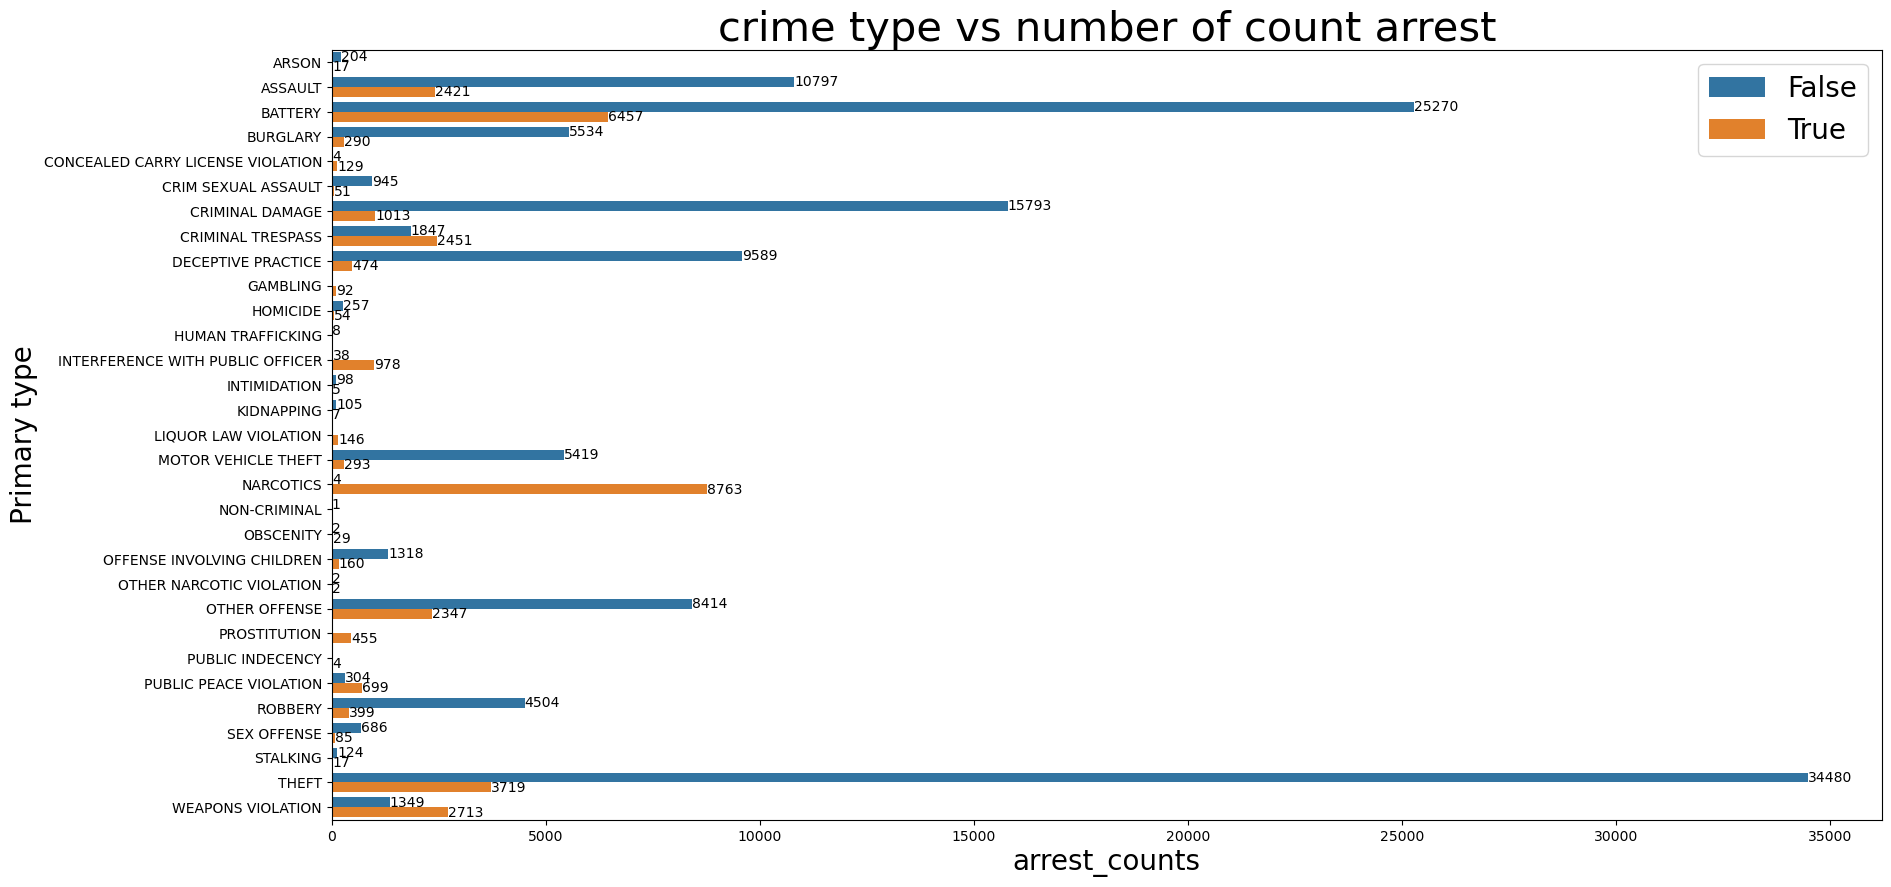

In [41]:
plt.figure(figsize=(20,10))
x=sns.barplot(y='Primary Type',x='arrest_counts',data=df1,hue='Arrest')
plt.title('crime type vs number of count arrest',fontsize=30)
plt.xlabel('arrest_counts',fontsize=20)
plt.ylabel('Primary type',fontsize=20)
plt.legend(fontsize=20)

for bars in x.containers:
    x.bar_label(bars)

# observation
1.highest not arrested crime is THEFT and second highest is BATTERY

2.highest arrested crime is NARCOTICS

In [42]:
#top ten location which has highest number of crime
df_4=df4.head(10)
df_4

,Location Description,total_crime
109,STREET,35875
95,RESIDENCE,26326
17,APARTMENT,21723
106,SIDEWALK,12634
84,OTHER,6451
89,PARKING LOT/GARAGE(NON.RESID.),4800
99,RESTAURANT,4529
107,SMALL RETAIL STORE,4265
15,ALLEY,3201
98,RESIDENTIAL YARD (FRONT/BACK),2999


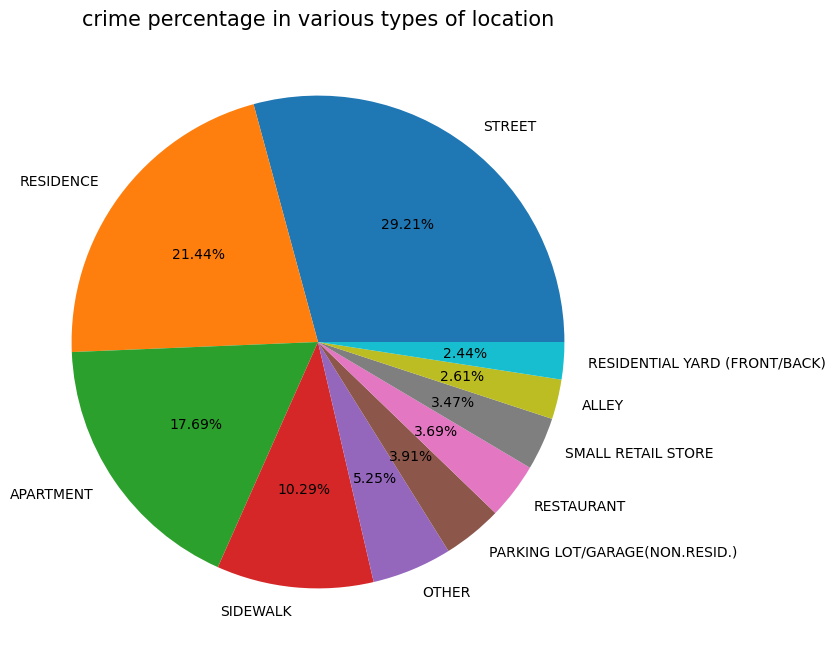

In [43]:
plt.figure(figsize=(8,8))
plt.title('crime percentage in various types of location',fontsize=15) 
plt.pie(df_4['total_crime'],labels=df_4['Location Description'],autopct='%.2f%%')
plt.show()

# observation
1.the number of crimes in STREET is too much high

2.second highest crime is happening in RESIDENCE

3.third highest crime is happening in APARTMENT

In [44]:
# top ten crime type with respect to total number of crime

df_5=df5.head(10)
df_5

,Primary Type,total_crime
29,THEFT,38199
2,BATTERY,31727
6,CRIMINAL DAMAGE,16806
1,ASSAULT,13218
22,OTHER OFFENSE,10761
8,DECEPTIVE PRACTICE,10063
17,NARCOTICS,8767
3,BURGLARY,5824
16,MOTOR VEHICLE THEFT,5712
26,ROBBERY,4903


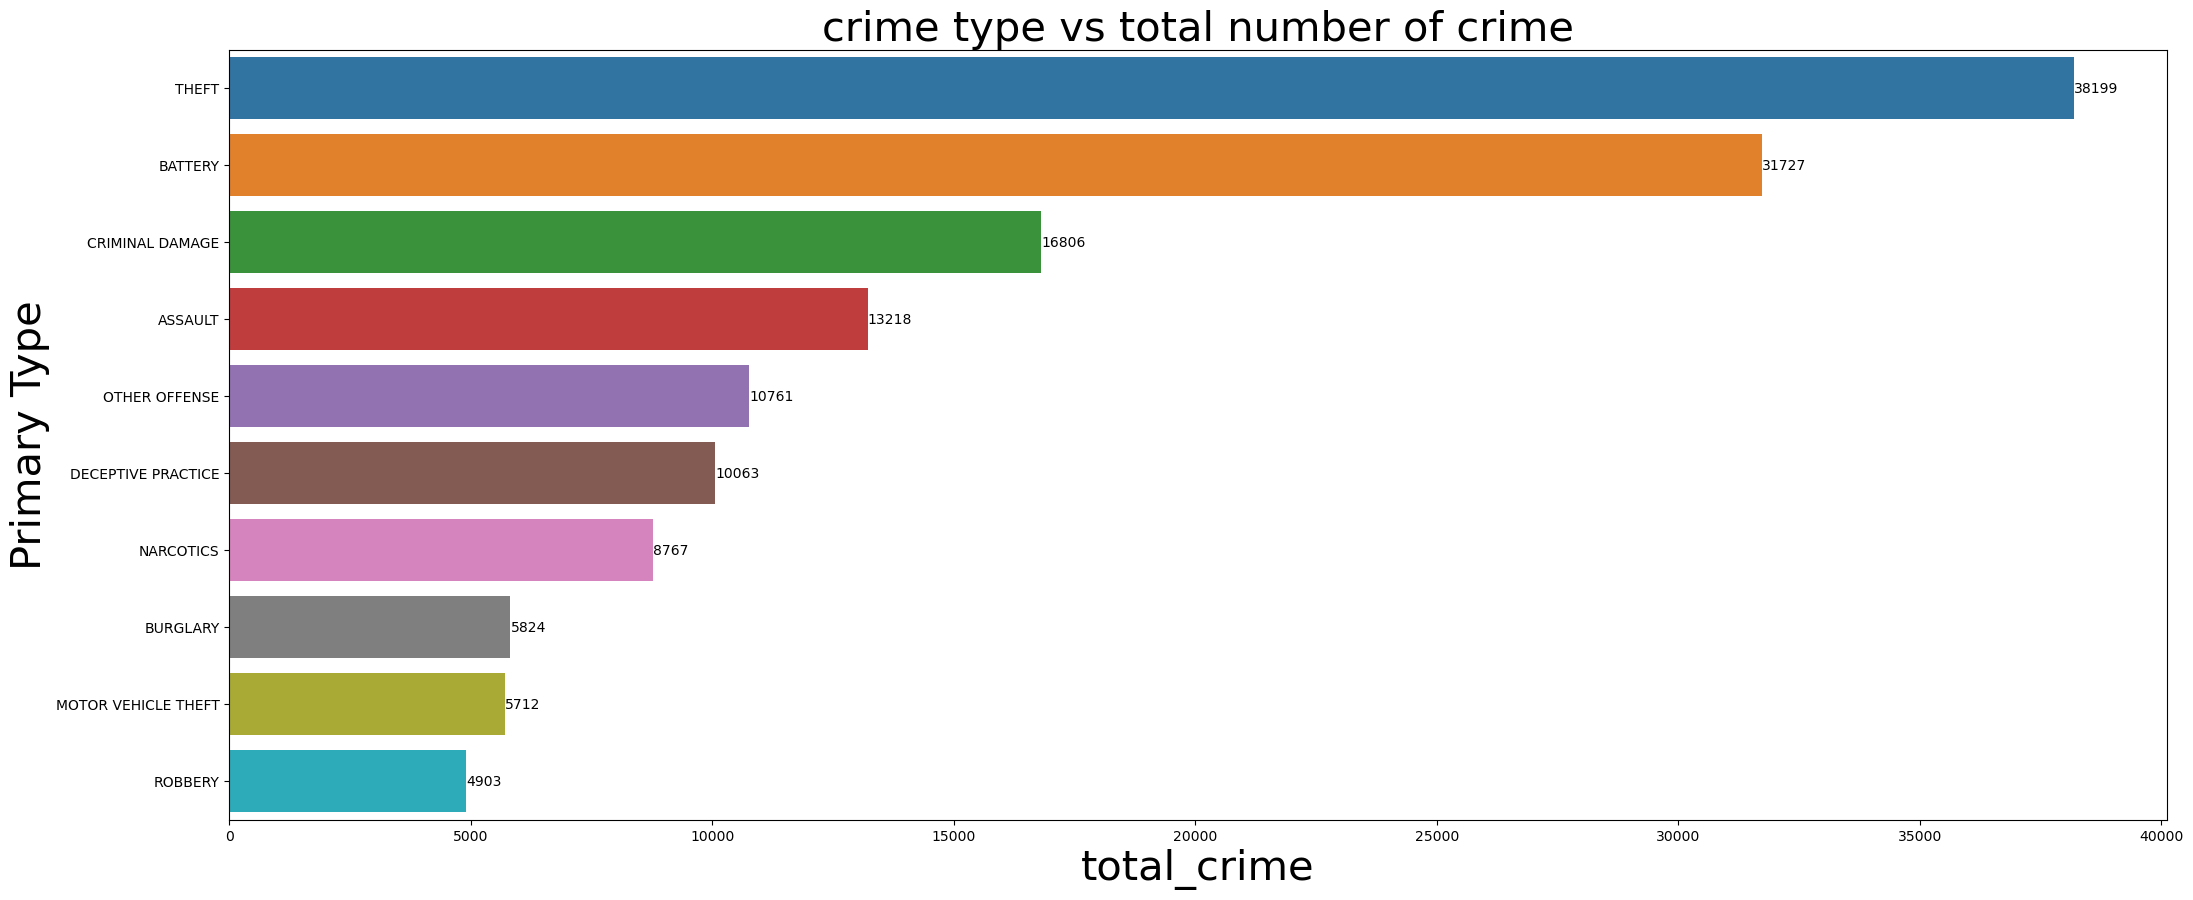

In [78]:
plt.figure(figsize=(25,10))
plt.title('crime type vs total number of crime',fontsize=30)
x=sns.barplot(x='total_crime',y='Primary Type',data=df_5)

plt.xlabel('total_crime',fontsize=30)
plt.ylabel('Primary Type',fontsize=30)

for bars in x.containers:
    x.bar_label(bars)

# observation
1.the crime type THEFT has highest recorded number of crimes

2.the second highest crime type is BATTERY

In [46]:
df_7=df7.head(10)
df_7

,block,crime_counts
0,0000X,6276
2,001XX,4719
3,002XX,3762
4,003XX,3282
9,008XX,2944
7,006XX,2858
16,015XX,2838
8,007XX,2832
6,005XX,2768
15,014XX,2735


Text(0, 0.5, 'crime_conts')

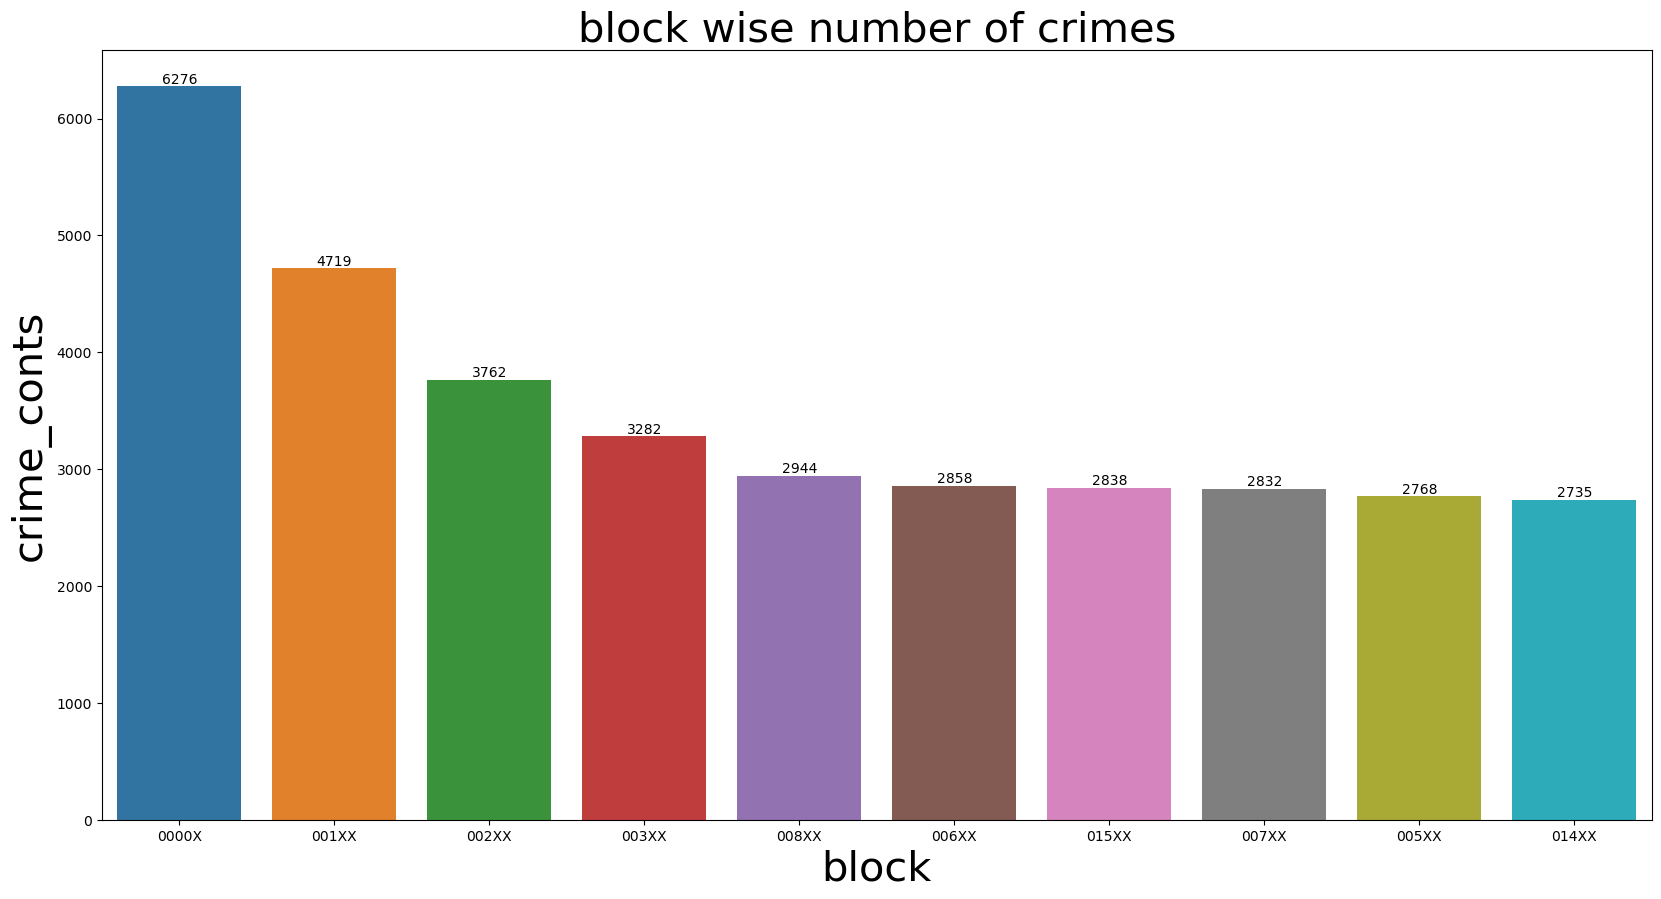

In [79]:
plt.figure(figsize=(20,10))
plt.title('block wise number of crimes',fontsize=30)


x=sns.barplot(x='block',y='crime_counts',data=df_7)

for bars in x.containers:
    x.bar_label(bars)

plt.xlabel('block',fontsize=30)
plt.ylabel('crime_conts',fontsize=30)


Text(0, 0.5, 'crime_counts')

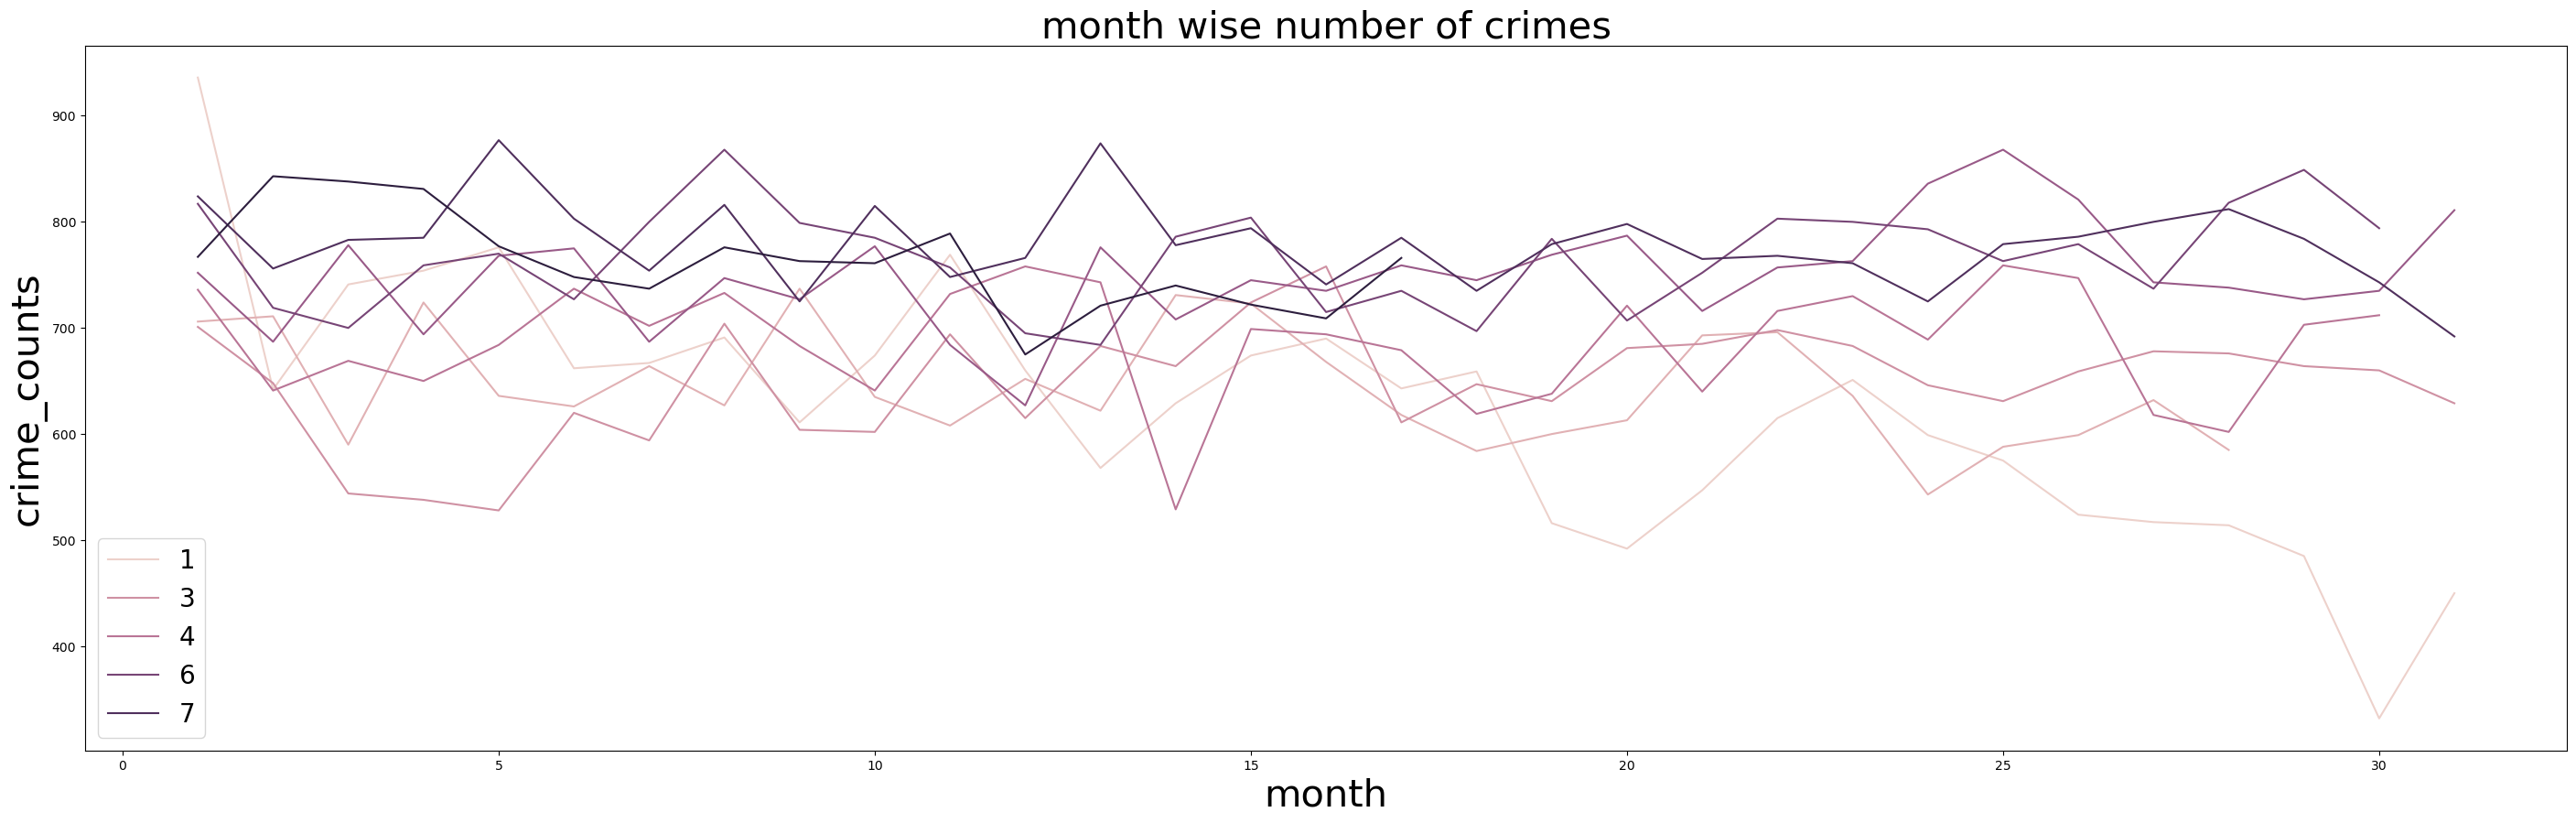

In [48]:
plt.figure(figsize=(35,10))

sns.lineplot(data=df9,x='day',y='crime_counts',hue='month',color='red')
plt.legend(fontsize=20)
plt.title('month wise number of crimes',fontsize=30)
plt.xlabel('month',fontsize=30)
plt.ylabel('crime_counts',fontsize=30)

Text(0, 0.5, 'crime_counts')

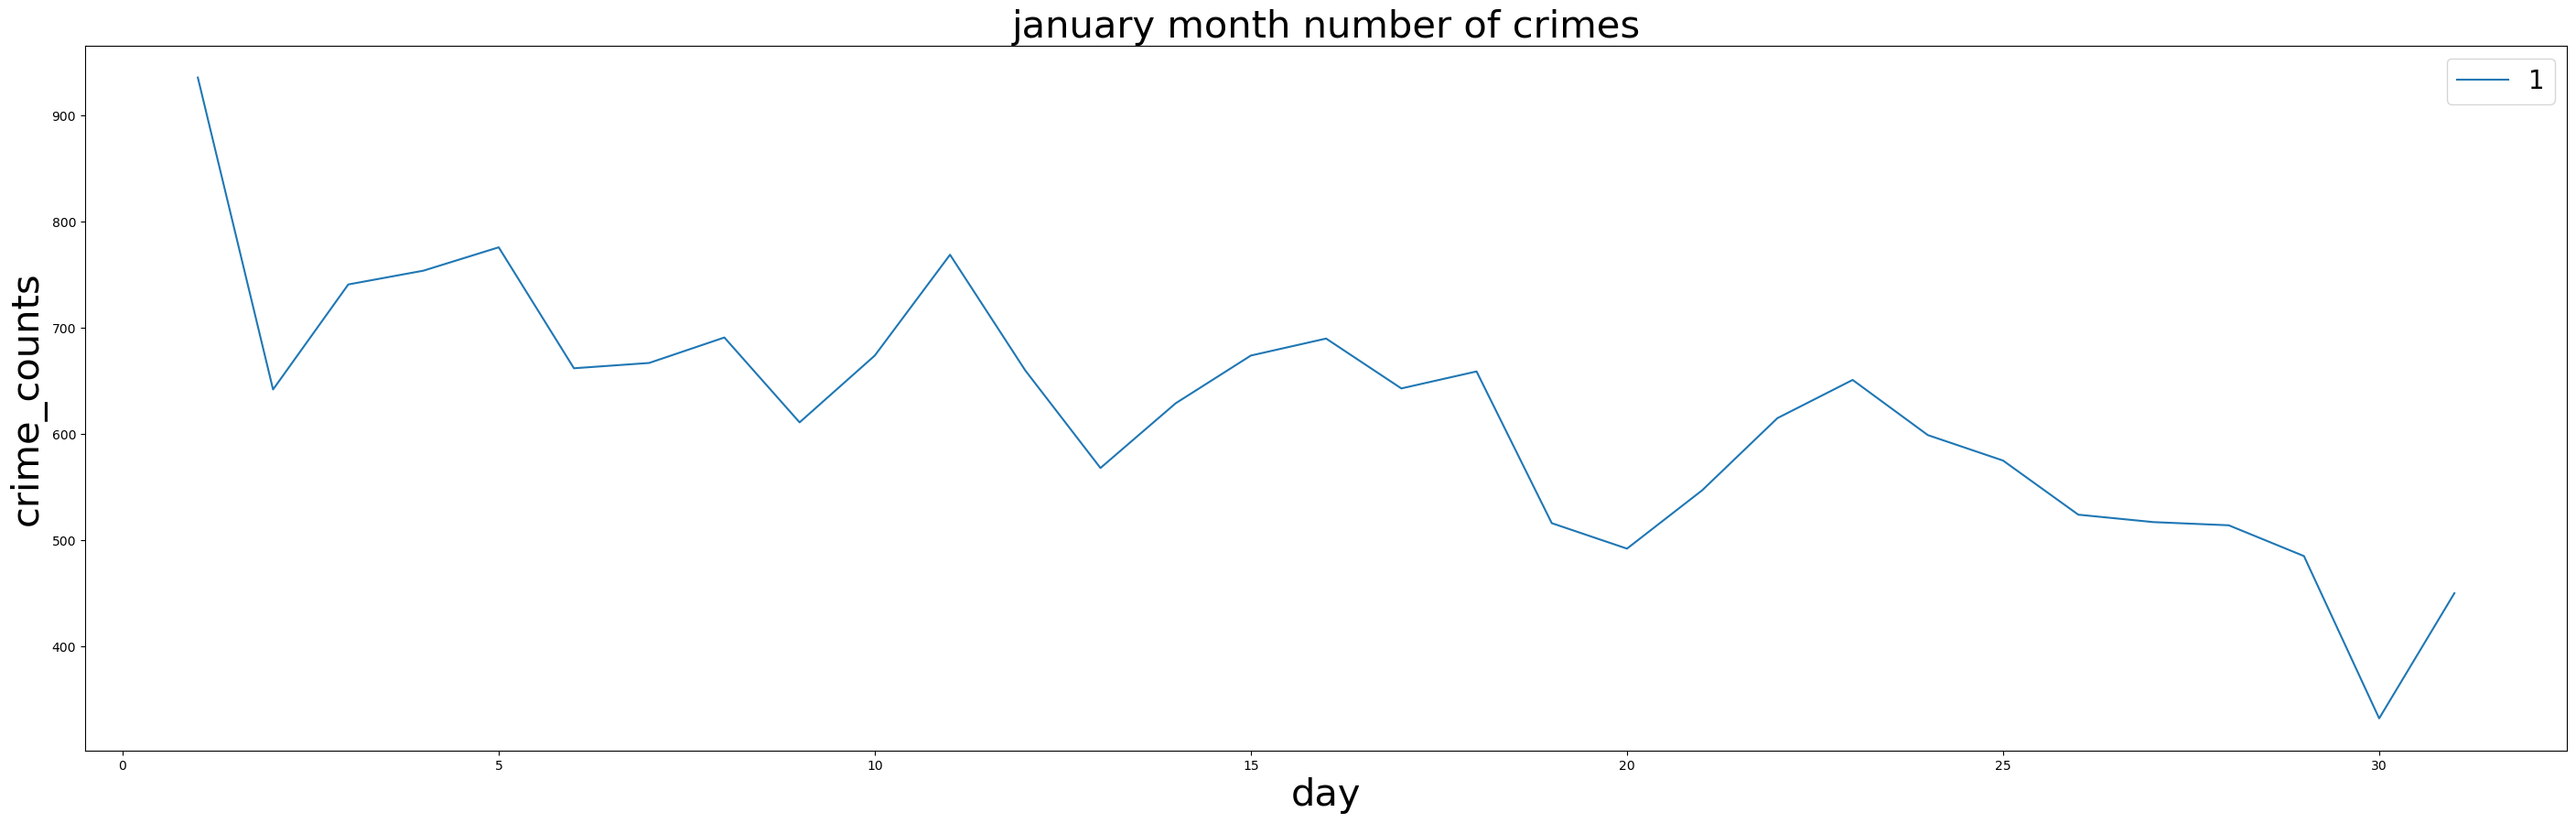

In [49]:
plt.figure(figsize=(35,10))

sns.lineplot(data=df10,x='day',y='crime_counts',hue='month',color='red')
plt.legend(fontsize=20)
plt.title('january month number of crimes',fontsize=30)
plt.xlabel('day',fontsize=30)
plt.ylabel('crime_counts',fontsize=30)

# observation

1.this graph showing in january month the number of crime decreasing

2.first week has the highest number of crime and last week has lowest number of crime

Text(0, 0.5, 'crime_counts')

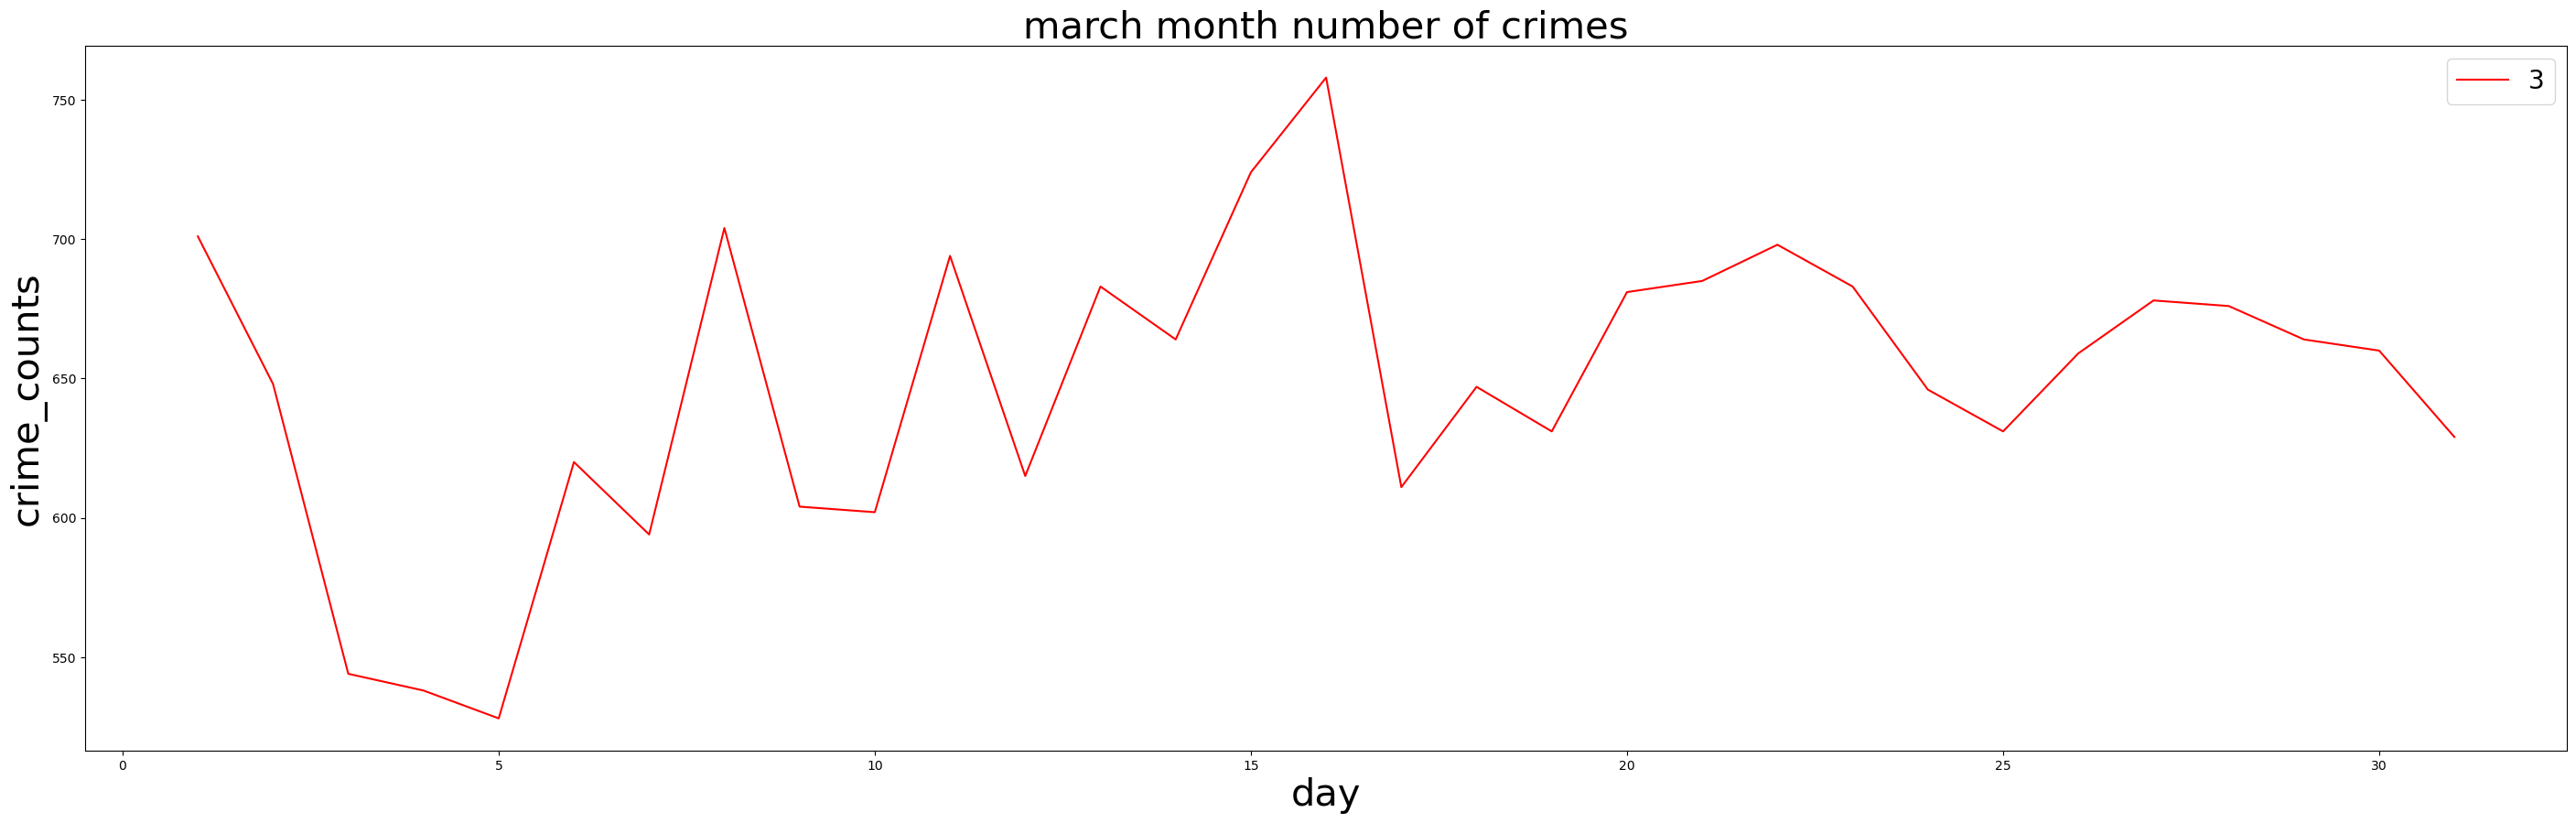

In [50]:
plt.figure(figsize=(35,10))

sns.lineplot(data=df11,x='day',y='crime_counts',hue='month',palette=['red'])
plt.legend(fontsize=20)
plt.title('march month number of crimes',fontsize=30)
plt.xlabel('day',fontsize=30)
plt.ylabel('crime_counts',fontsize=30)



# observation

1.this graph showing mid of the march has the pick value of number of crimes.

2.in first week day 5 has lowest record of crime.

Text(0, 0.5, 'crime_counts')

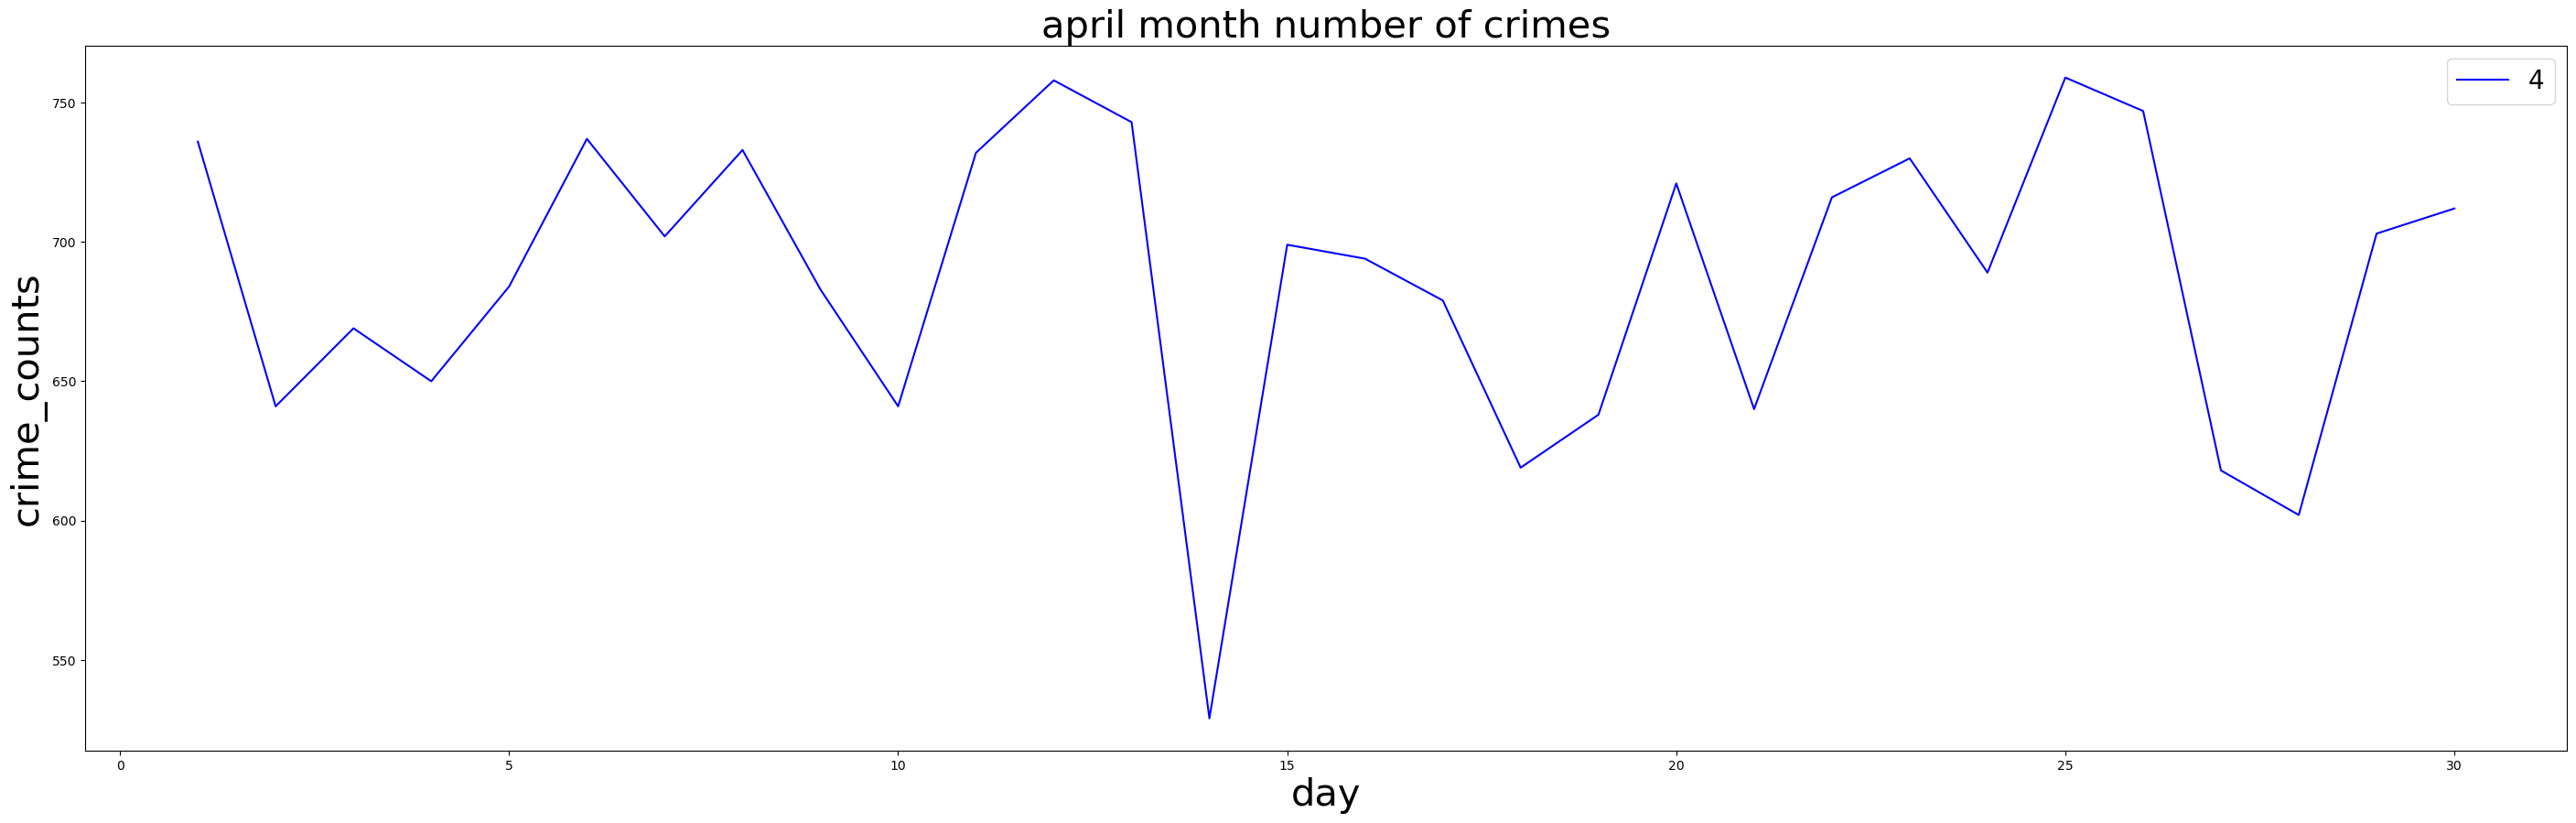

In [51]:
plt.figure(figsize=(35,10))

sns.lineplot(data=df12,x='day',y='crime_counts',hue='month',palette=['blue'])
plt.legend(fontsize=20)
plt.title('april month number of crimes',fontsize=30)
plt.xlabel('day',fontsize=30)
plt.ylabel('crime_counts',fontsize=30)

# observation

1.lowest number of crime was happend in mid of the month of april.

Text(0, 0.5, 'crime_counts')

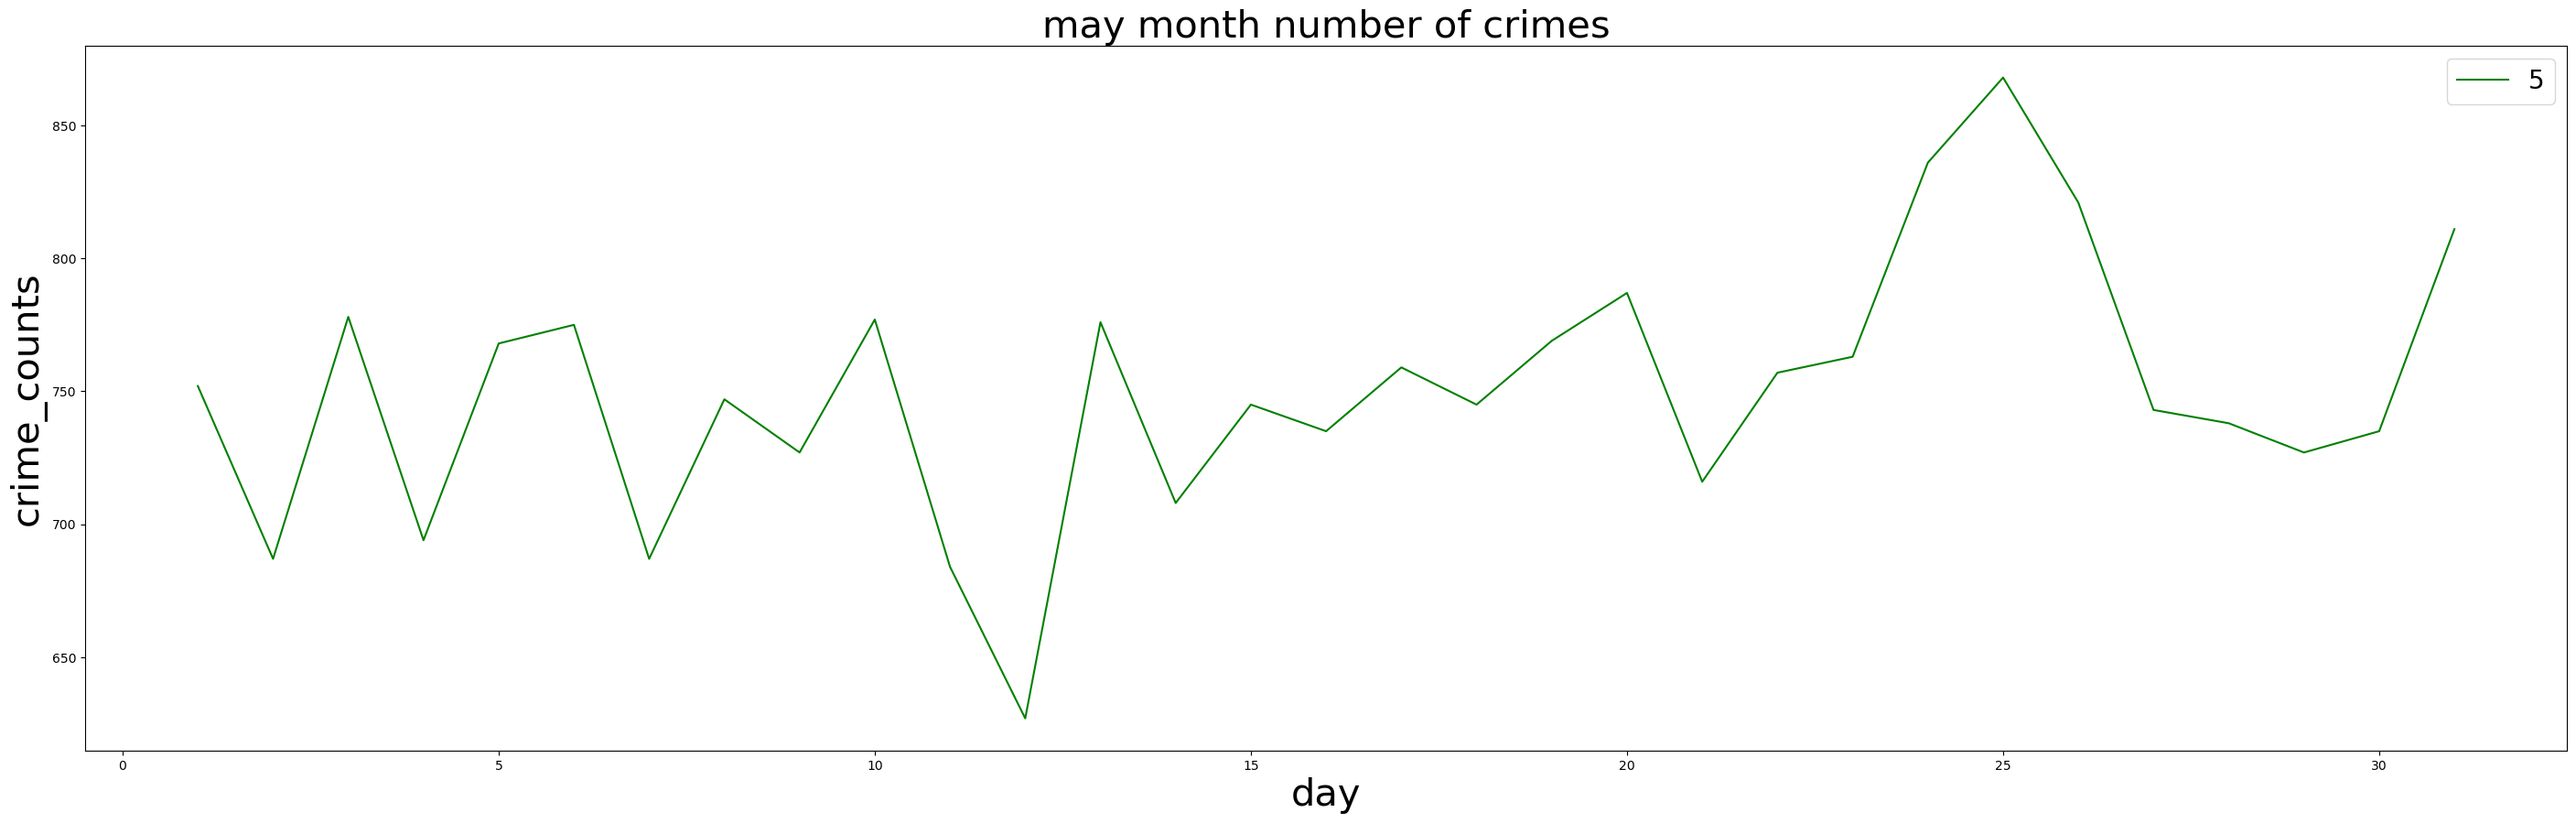

In [52]:
plt.figure(figsize=(35,10))

sns.lineplot(data=df13,x='day',y='crime_counts',hue='month',palette=['green'])
plt.legend(fontsize=20)
plt.title('may month number of crimes',fontsize=30)
plt.xlabel('day',fontsize=30)
plt.ylabel('crime_counts',fontsize=30)

# observation

1.In may month lowest number of crime was happend  between day 10 to 15.and

2.highest number of crime in may month was happend in day 25,26 and 27.

Text(0, 0.5, 'crime_counts')

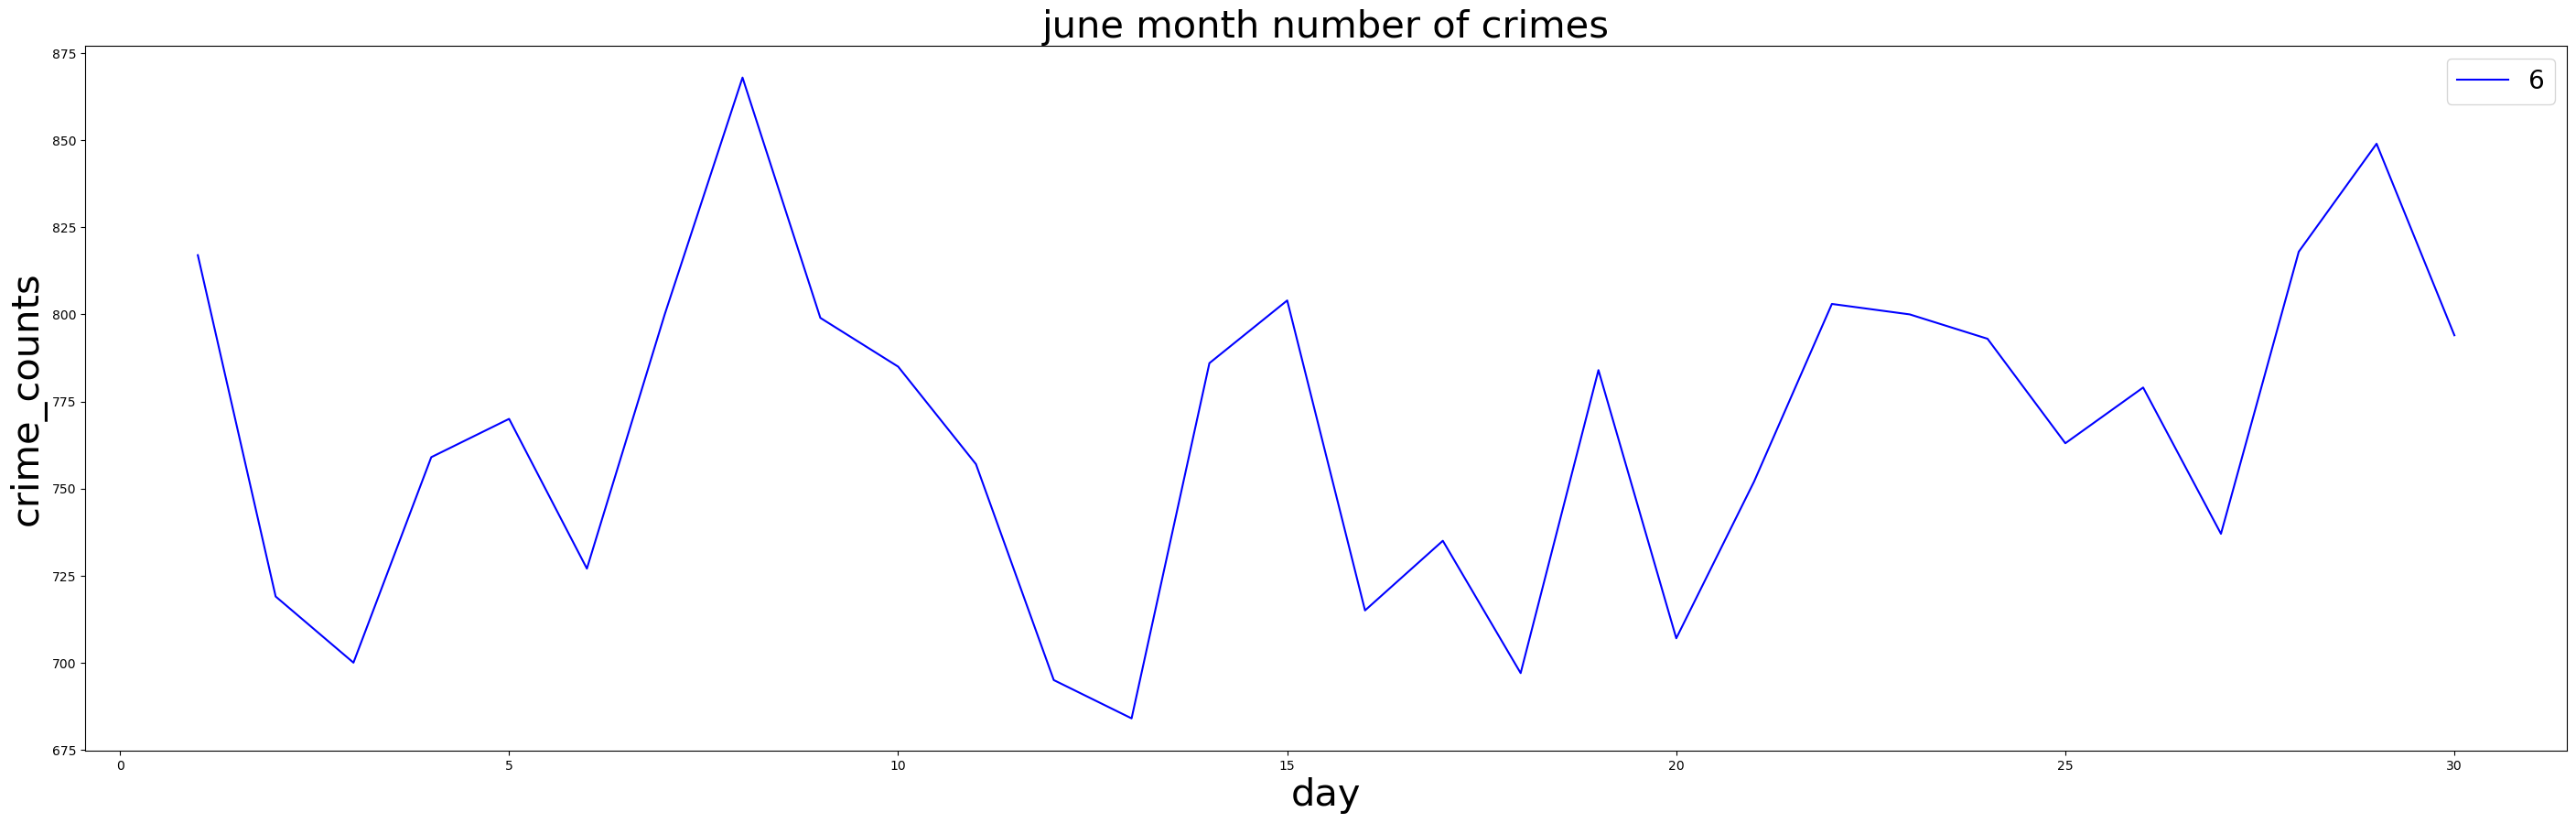

In [53]:
plt.figure(figsize=(35,10))

sns.lineplot(data=df14,x='day',y='crime_counts',hue='month',palette=['blue'])
plt.legend(fontsize=20)
plt.title('june month number of crimes',fontsize=30)
plt.xlabel('day',fontsize=30)
plt.ylabel('crime_counts',fontsize=30)

# observation

1.this graph is showing highest number of crime is between day 5 to 10.

2.lowest crime is between day 12 and 13.


Text(0, 0.5, 'crime_counts')

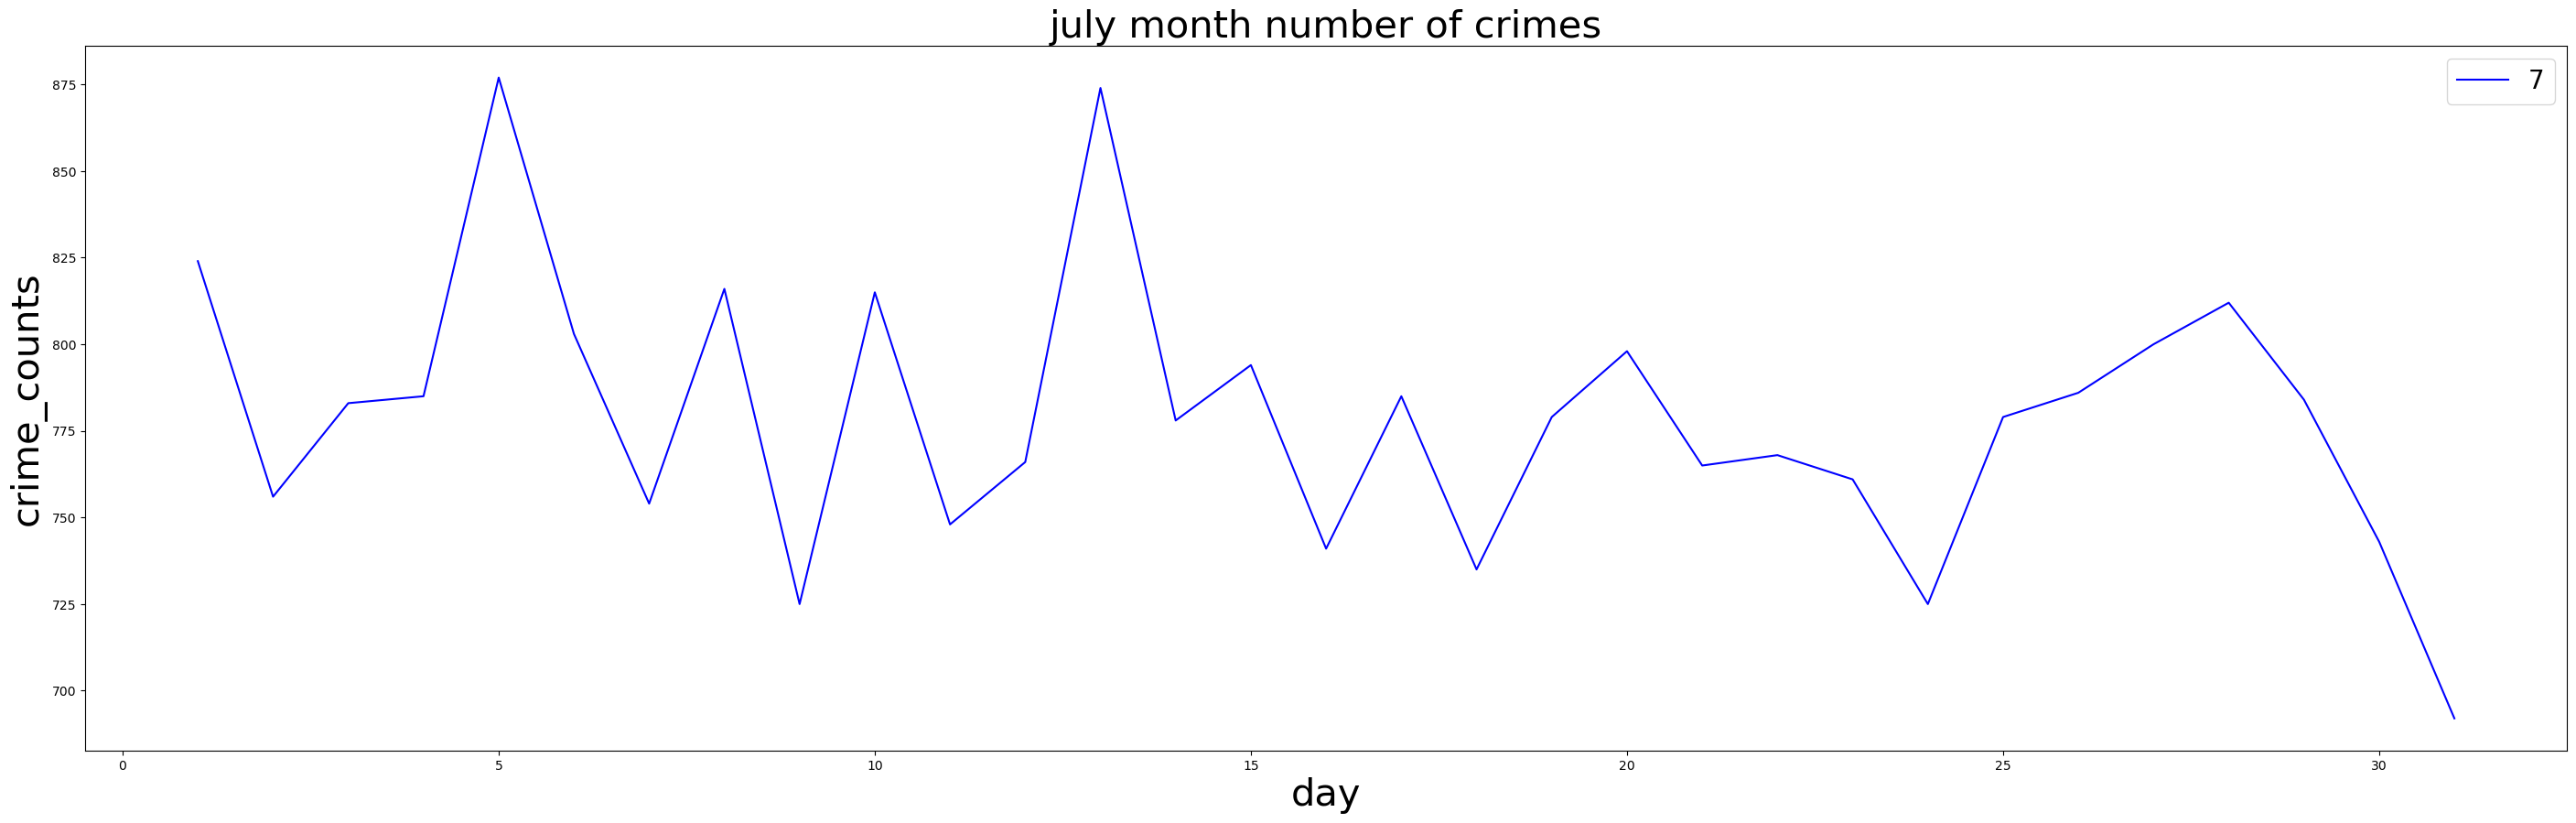

In [54]:
plt.figure(figsize=(35,10))

sns.lineplot(data=df15,x='day',y='crime_counts',hue='month',palette=['blue'])
plt.legend(fontsize=20)
plt.title('july month number of crimes',fontsize=30)
plt.xlabel('day',fontsize=30)
plt.ylabel('crime_counts',fontsize=30)

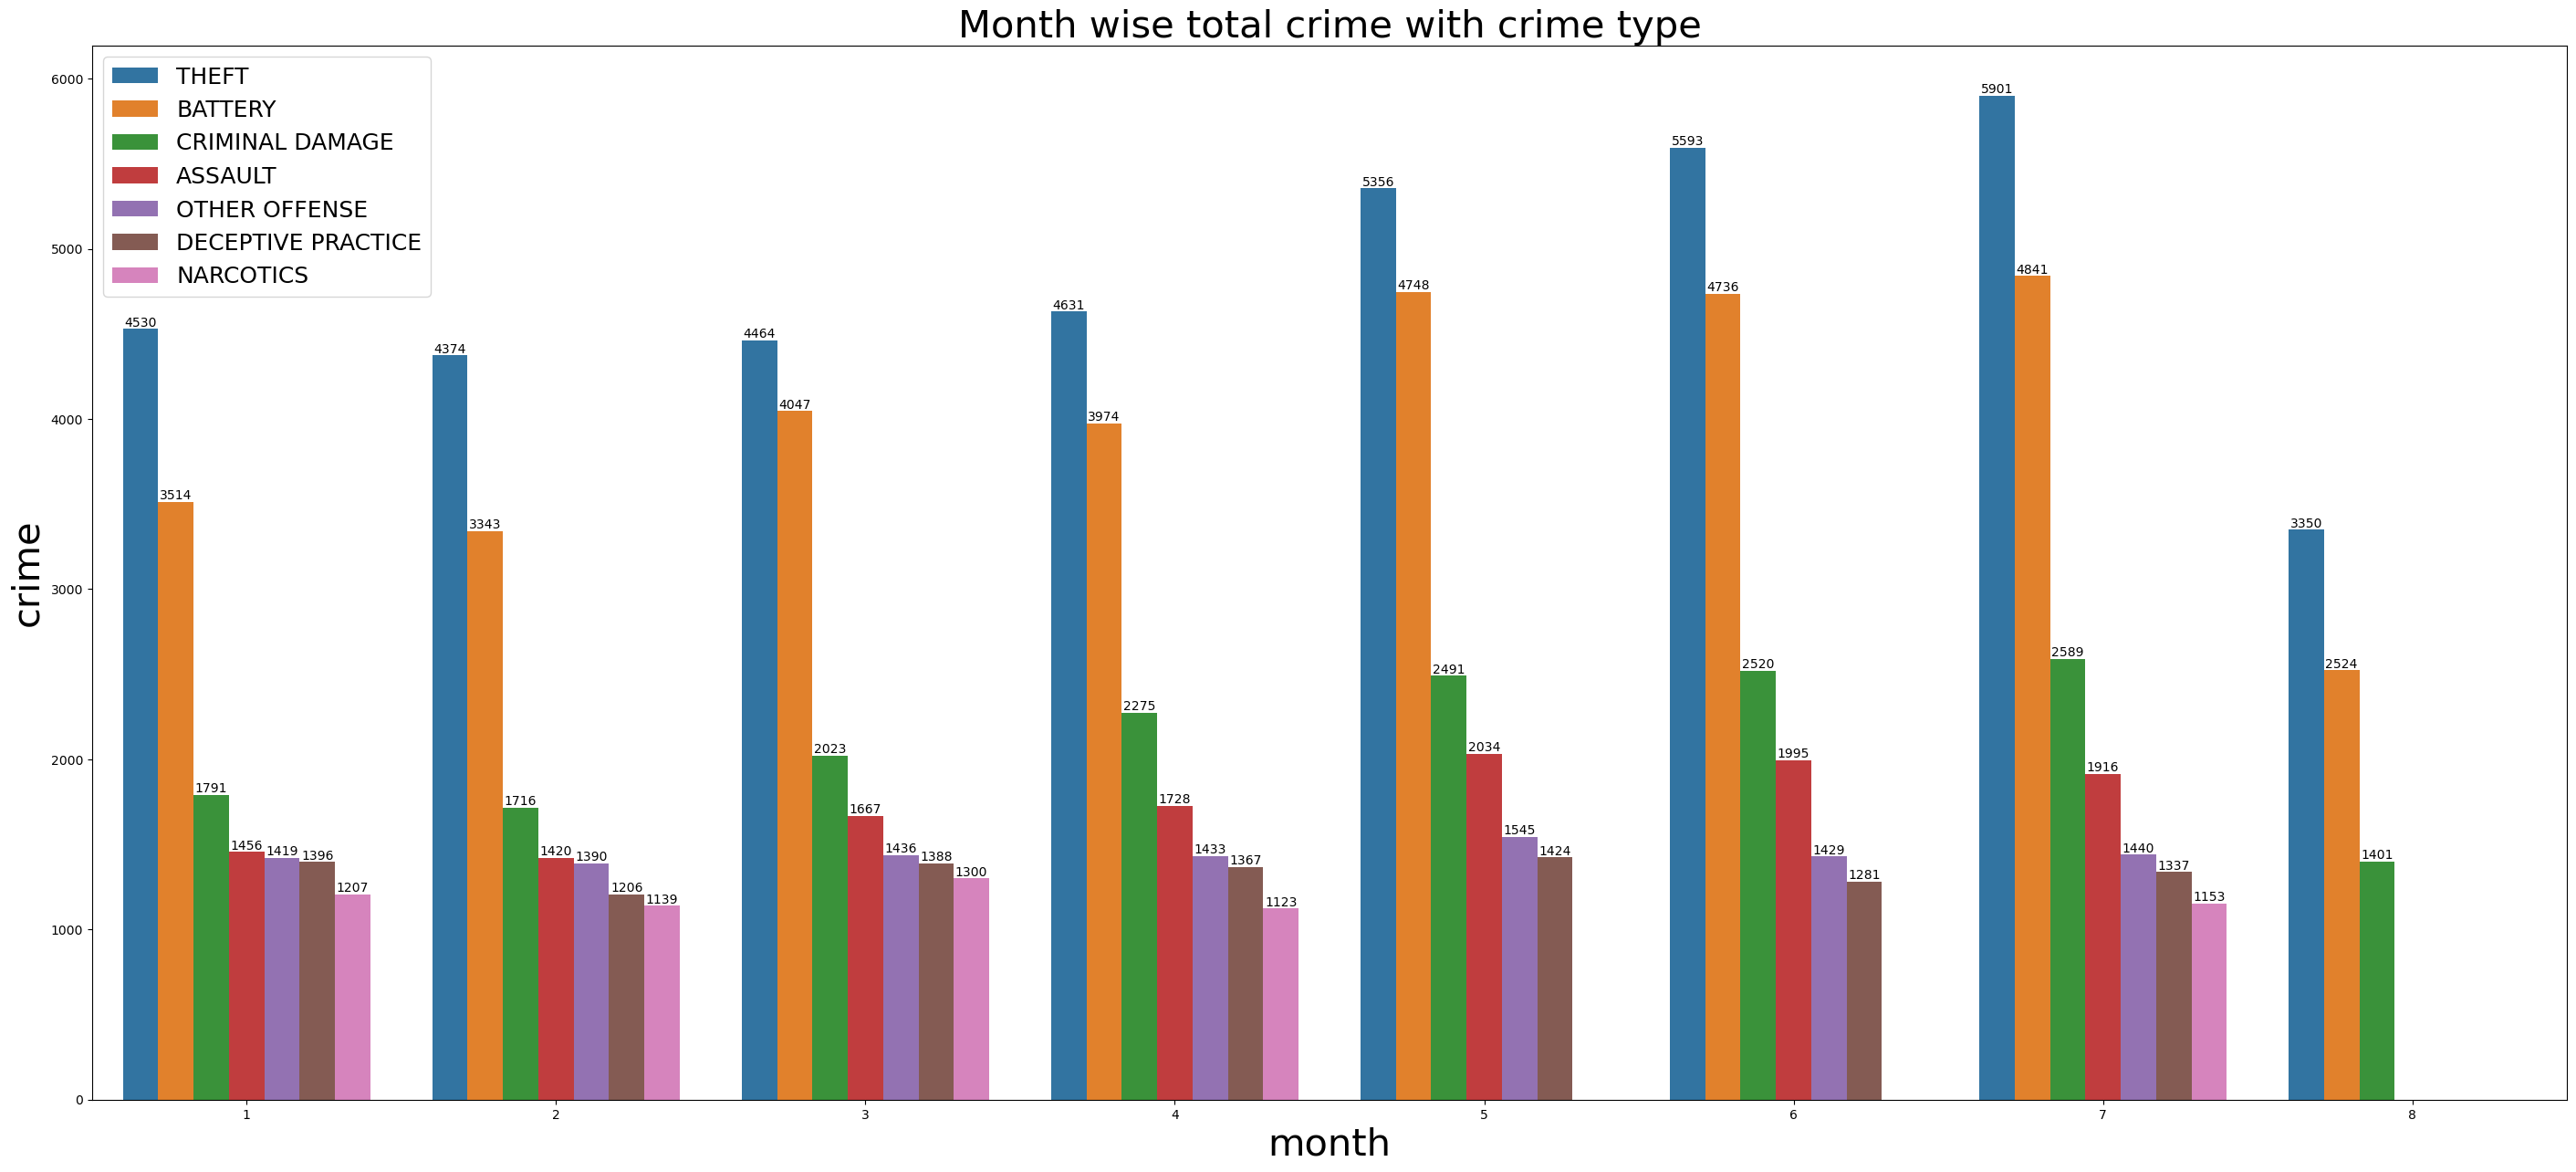

In [63]:
plt.figure(figsize=(35,15))
plt.title('Month wise total crime with crime type',fontsize=30)
x=sns.barplot(data=df_16,x='month',y='crime',hue='Primary Type',errwidth=0)

plt.xlabel('month',fontsize=30)
plt.ylabel('crime',fontsize=30)
plt.legend(fontsize=18)

for bars in x.containers:
    x.bar_label(bars,)
    
plt.show()

# observation
1.this graph is showing every month has highest record with crime type THEFT

2.second position is BATTERY

3.Every month lowest crime was happend in NARCOTICS

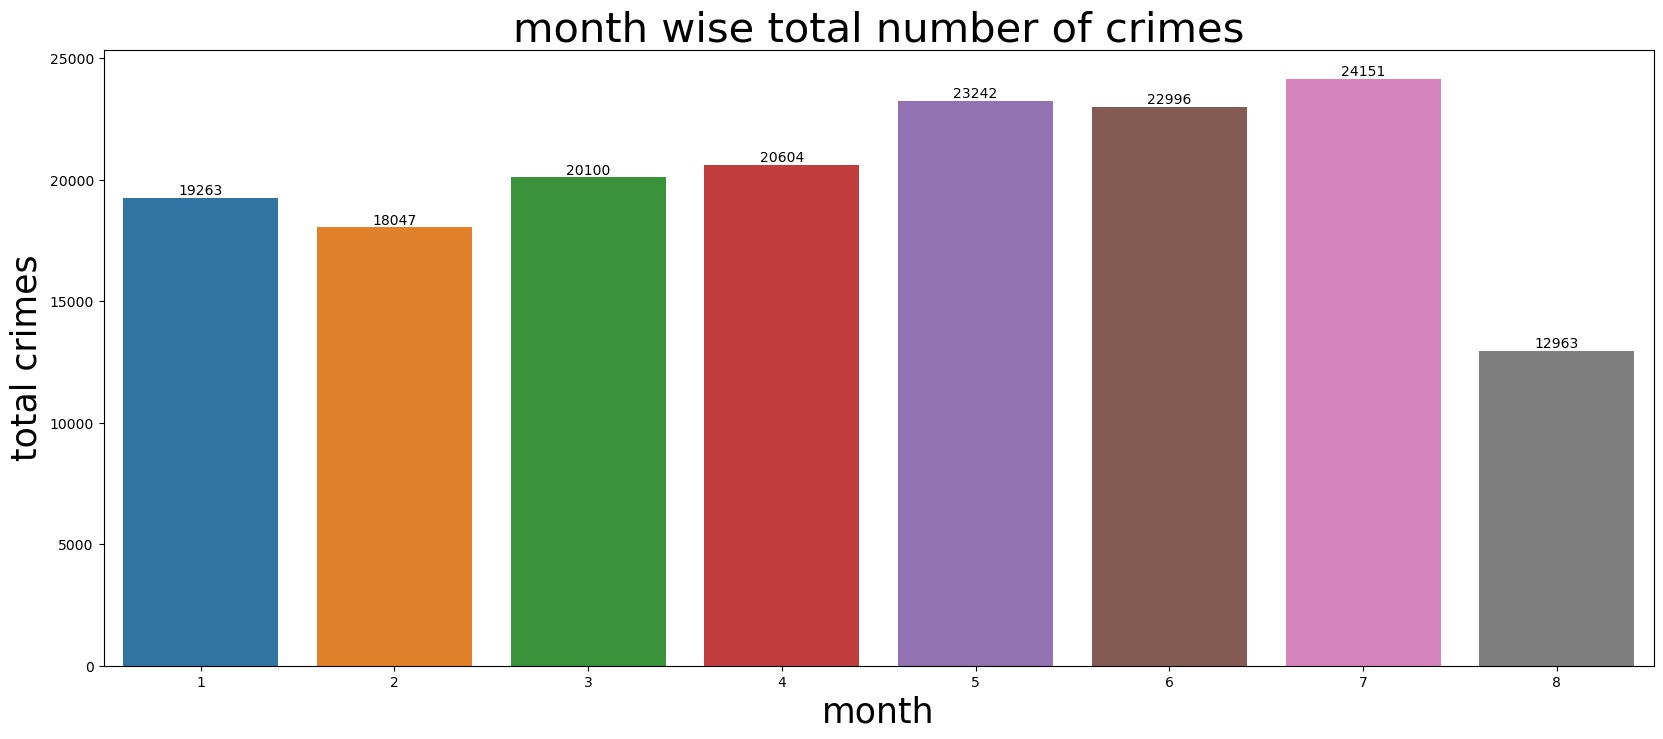

In [56]:
plt.figure(figsize=(20,8))
plt.title('month wise total number of crimes',fontsize=30)
x=sns.barplot(data=df17,x='month',y='total crimes')
plt.xlabel('month',fontsize=25)
plt.ylabel('total crimes',fontsize=25)

for bars in x.containers:
    x.bar_label(bars)

# conclusion

1.highest number of crimes is happening in street.

2.THEFT is one type of crime ,who are involved ,maximum of them are not arrested.

3.block 0000X has the highest number of crime.

4.highest number of crime was happend in may,june and july.